# US National Park Biodiversity

## I. Introduction

First, we need to import our essential libaries for analysis and display.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We will also import the `parks.csv` and `species.csv` from the `data` directory.

These directories are from the National Park Service.

In [2]:
parks = pd.read_csv('data/parks.csv')
species = pd.read_csv('data/species.csv', low_memory=False)

## II. Analysis

### A. Preprocessing

In [3]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [4]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [5]:
species.isna().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

Cleaning data, decided to drop columns from each dataset.

From `parks.csv`: park code and acres
From `species.csv`: species ID, scientific name, record status, occurance, seasonality, and extra column

In [6]:
## Replace misplaced values with values from the extra column
species['Conservation Status'] = species.apply(
    lambda row: row['Unnamed: 13'] 
    if row['Conservation Status'] == 'Resident'
    or row['Conservation Status'] == 'Breeder' 
    or row['Conservation Status'] == 'Migratory' 
    else row['Conservation Status'], axis=1
)

In [7]:
## Drop unused columns in this project
parks.drop(labels=['Park Code', 'Acres'], inplace=True, axis=1)
species.drop(
    labels=['Species ID', 'Order', 'Family', 'Record Status', 'Occurrence', 'Seasonality', 'Unnamed: 13'],
    inplace=True, axis=1
)

parks.columns

Index(['Park Name', 'State', 'Latitude', 'Longitude'], dtype='object')

In [8]:
parks.head()

,Park Name,State,Latitude,Longitude
0,Acadia National Park,ME,44.35,-68.21
1,Arches National Park,UT,38.68,-109.57
2,Badlands National Park,SD,43.75,-102.50
3,Big Bend National Park,TX,29.25,-103.25
4,Biscayne National Park,FL,25.65,-80.08


In [9]:
species.head()

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status
0,Acadia National Park,Mammal,Alces alces,Moose,Native,Rare,NaN
1,Acadia National Park,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Native,Abundant,NaN
2,Acadia National Park,Mammal,Canis latrans,"Coyote, Eastern Coyote",Not Native,Common,Species of Concern
3,Acadia National Park,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Native,NaN,Endangered
4,Acadia National Park,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Unknown,Common,NaN


In [10]:
species.isna().sum()

Park Name                   0
Category                    0
Scientific Name             0
Common Names                0
Nativeness              25045
Abundance               42942
Conservation Status    114541
dtype: int64

In [11]:
print(parks.columns)
print(species.columns)

Index(['Park Name', 'State', 'Latitude', 'Longitude'], dtype='object')
Index(['Park Name', 'Category', 'Scientific Name', 'Common Names',
       'Nativeness', 'Abundance', 'Conservation Status'],
      dtype='object')


In [12]:
parks.columns=['park_name', 'state', 'latitude', 'longtitude']
species.columns=['park_name', 'category', 'scientific_name','common_names', 'nativeness', 'abundance', 'conservation_status']

In [13]:
parks.head()

,park_name,state,latitude,longtitude
0,Acadia National Park,ME,44.35,-68.21
1,Arches National Park,UT,38.68,-109.57
2,Badlands National Park,SD,43.75,-102.50
3,Big Bend National Park,TX,29.25,-103.25
4,Biscayne National Park,FL,25.65,-80.08


In [14]:
species.head()

,park_name,category,scientific_name,common_names,nativeness,abundance,conservation_status
0,Acadia National Park,Mammal,Alces alces,Moose,Native,Rare,NaN
1,Acadia National Park,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Native,Abundant,NaN
2,Acadia National Park,Mammal,Canis latrans,"Coyote, Eastern Coyote",Not Native,Common,Species of Concern
3,Acadia National Park,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Native,NaN,Endangered
4,Acadia National Park,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Unknown,Common,NaN


Merging the two datasets for easier navigation for analysis

In [15]:
parks_species = pd.merge(species, parks, on="park_name", how="outer")
parks_species

,park_name,category,scientific_name,common_names,nativeness,abundance,conservation_status,state,latitude,longtitude
0,Acadia National Park,Mammal,Alces alces,Moose,Native,Rare,NaN,ME,44.35,-68.21
1,Acadia National Park,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Native,Abundant,NaN,ME,44.35,-68.21
2,Acadia National Park,Mammal,Canis latrans,"Coyote, Eastern Coyote",Not Native,Common,Species of Concern,ME,44.35,-68.21
3,Acadia National Park,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Native,NaN,Endangered,ME,44.35,-68.21
4,Acadia National Park,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Unknown,Common,NaN,ME,44.35,-68.21
...,...,...,...,...,...,...,...,...,...,...
119243,Zion National Park,Vascular Plant,Solanum triflorum,Cut-Leaf Nightshade,Native,Uncommon,NaN,UT,37.30,-113.05
119244,Zion National Park,Vascular Plant,Vitis arizonica,Canyon Grape,Native,Uncommon,NaN,UT,37.30,-113.05
119245,Zion National Park,Vascular Plant,Vitis vinifera,Wine Grape,Not Native,Uncommon,NaN,UT,37.30,-113.05
119246,Zion National Park,Vascular Plant,Larrea tridentata,Creosote Bush,Native,Rare,NaN,UT,37.30,-113.05


Remove National Park from the Park Names

In [16]:
parks_species.park_name = parks_species.park_name.str.replace('National Park', '')
parks_species.head()

,park_name,category,scientific_name,common_names,nativeness,abundance,conservation_status,state,latitude,longtitude
0,Acadia,Mammal,Alces alces,Moose,Native,Rare,NaN,ME,44.35,-68.21
1,Acadia,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Native,Abundant,NaN,ME,44.35,-68.21
2,Acadia,Mammal,Canis latrans,"Coyote, Eastern Coyote",Not Native,Common,Species of Concern,ME,44.35,-68.21
3,Acadia,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Native,NaN,Endangered,ME,44.35,-68.21
4,Acadia,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Unknown,Common,NaN,ME,44.35,-68.21


In [17]:
parks_species.conservation_status = pd.Categorical(
    parks_species.conservation_status,
    categories=[
        'Under Review', 'In Recovery', 'Species of Concern',
        'Proposed Threatened', 'Threatened', 'Proposed Endangered',
        'Endangered', 'Extinct'],
    ordered=True
)

In [18]:
parks_species.abundance = pd.Categorical(
    parks_species.abundance,
    categories=['Rare', 'Occasional', 'Uncommon', 'Common', 'Abundant'],
    ordered=True
)

In [19]:
parks_species.head()

,park_name,category,scientific_name,common_names,nativeness,abundance,conservation_status,state,latitude,longtitude
0,Acadia,Mammal,Alces alces,Moose,Native,Rare,NaN,ME,44.35,-68.21
1,Acadia,Mammal,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Native,Abundant,NaN,ME,44.35,-68.21
2,Acadia,Mammal,Canis latrans,"Coyote, Eastern Coyote",Not Native,Common,Species of Concern,ME,44.35,-68.21
3,Acadia,Mammal,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Native,NaN,Endangered,ME,44.35,-68.21
4,Acadia,Mammal,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Unknown,Common,NaN,ME,44.35,-68.21


### B. Data Exploration

Way more Vascular Plants, must keep in mind when identifying number of species that are identified as endangered

Text(0, 0.5, 'Category')

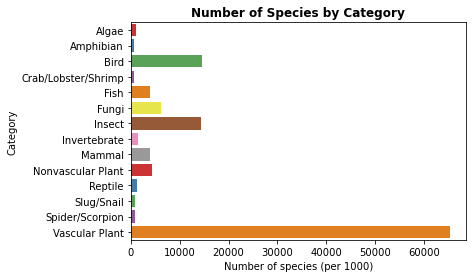

In [20]:
## Group data by category
species_categories = parks_species.groupby('category').scientific_name.count().reset_index()
species_categories.columns = ['category', 'species_count']

## Plot a bar chart to compare the number of species of different categories
sns.barplot(x='species_count', y='category', data=species_categories, palette='Set1')
plt.title('Number of Species by Category', weight='bold')
plt.xlabel('Number of species (per 1000)')
plt.ylabel('Category')

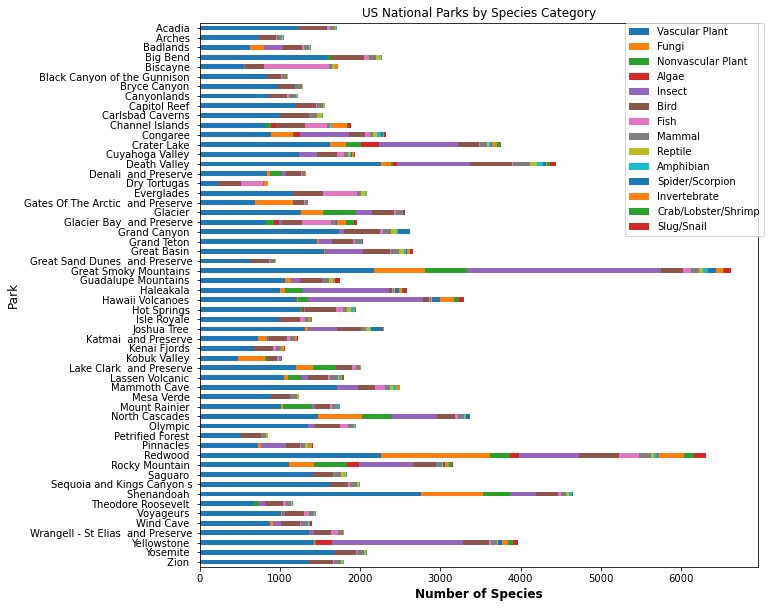

<Figure size 432x288 with 0 Axes>

In [21]:
## Group data by park_name and category
park_category = parks_species.groupby(['park_name', 'category']).scientific_name.count().reset_index()
pivoted_park_category = pd.pivot_table(
    data=park_category, 
    index='park_name', 
    columns='category', 
    values='scientific_name'
)

pivoted_park_category['Total'] = pivoted_park_category.apply(lambda row: np.sum(row), axis=1)

## Plot a bar plot to compare the total numbers of animal species in each park
pivoted_park_category.plot(
    y=['Vascular Plant', 'Fungi', 'Nonvascular Plant', 'Algae', 
       'Insect', 'Bird', 'Fish', 'Mammal', 'Reptile',
       'Amphibian', 'Spider/Scorpion', 'Invertebrate',
       'Crab/Lobster/Shrimp', 'Slug/Snail'], 
    kind='barh', stacked=True, figsize=(10,10))
plt.legend(bbox_to_anchor=(1.02, 1.01))
plt.title('US National Parks by Species Category')
plt.ylabel('Park', fontsize=12)
plt.xlabel('Number of Species', fontsize=12, weight='bold')
plt.gca().invert_yaxis()
plt.show()
plt.clf()

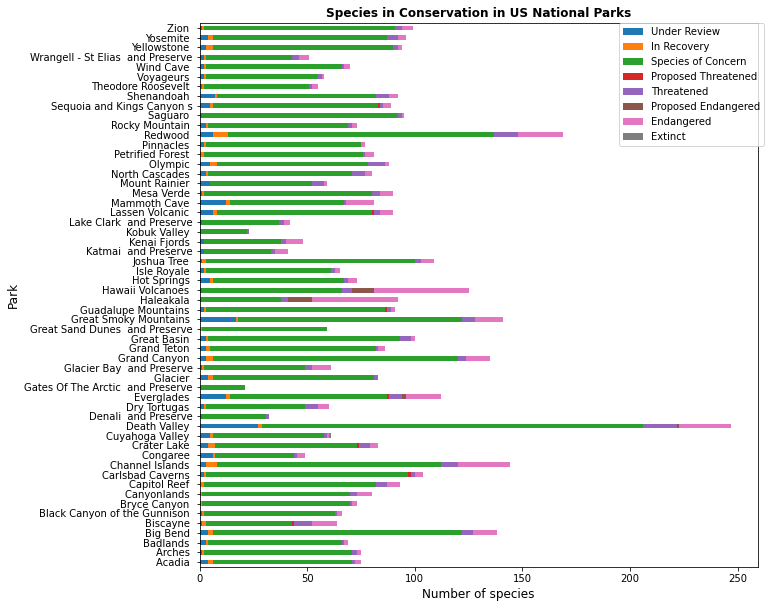

<Figure size 432x288 with 0 Axes>

In [22]:
## Group data by park_name and conservation status
park_conservation = parks_species.groupby(['park_name', 'conservation_status']).scientific_name.count().reset_index()
pivoted_park_conservation = pd.pivot_table(
    data=park_conservation, index='park_name',
    columns='conservation_status',
    values='scientific_name'
)

pivoted_park_conservation.columns = pivoted_park_conservation.columns.astype(str)
pivoted_park_conservation['Total'] = pivoted_park_conservation.apply(lambda row: np.sum(row), axis=1)

## Plot a bar chart to visualize the data
pivoted_park_conservation.plot(y=park_conservation.conservation_status.unique(),
    kind='barh', stacked=True, figsize=(10,10))
plt.legend(bbox_to_anchor=(1.02, 1.01))
plt.title('Species in Conservation in US National Parks', weight='bold')
plt.ylabel('Park', fontsize=12)
plt.xlabel('Number of species', fontsize=12)
plt.show()
plt.clf()

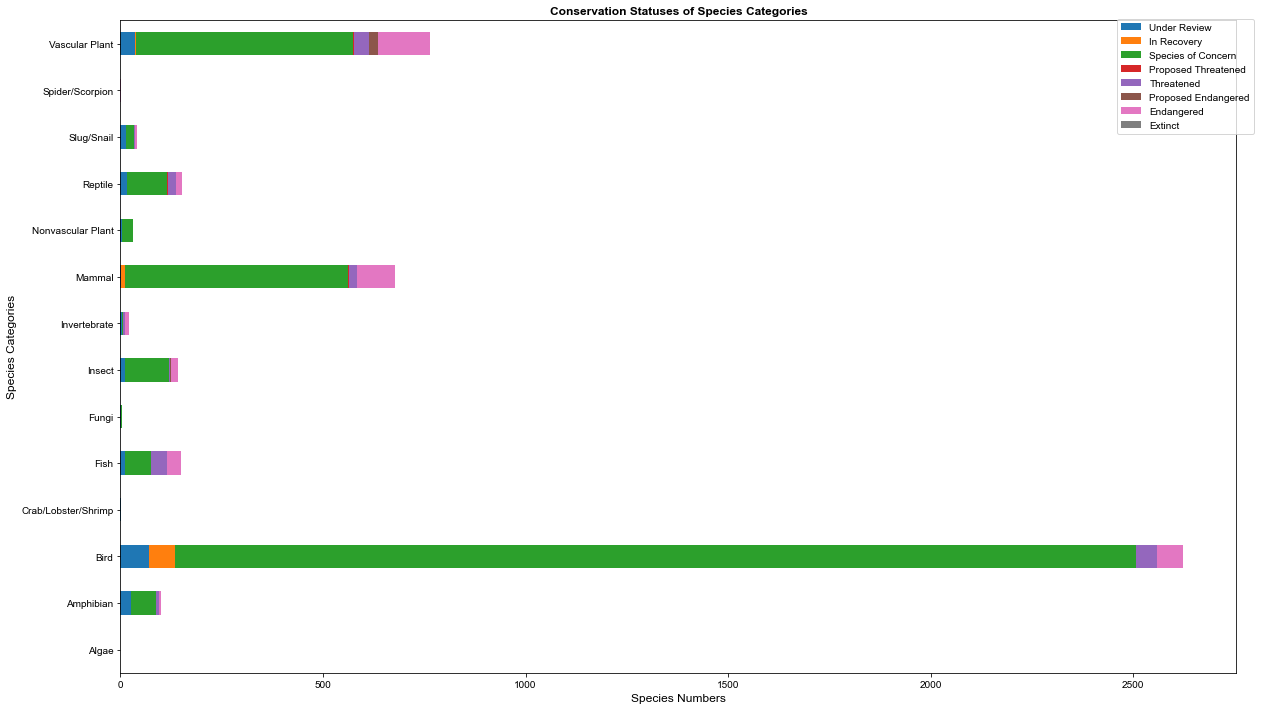

<Figure size 432x288 with 0 Axes>

In [23]:
## Group data by category and conservation status
conservation_category = parks_species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()
pivoted_conservation_category = pd.pivot_table(
    data=conservation_category, index='category',
    columns='conservation_status',
    values='scientific_name'
)

pivoted_conservation_category.columns = pivoted_conservation_category.columns.astype(str)
pivoted_conservation_category['Total'] = pivoted_conservation_category.apply(lambda row: np.sum(row), axis=1)

## Plot a bar chart to visualize the data
pivoted_conservation_category.plot(
    y=conservation_category.conservation_status.unique(),
    kind='barh', stacked=True, figsize=(20, 12)
)
plt.legend(bbox_to_anchor=(1.02, 1.01))
plt.title('Conservation Statuses of Species Categories', weight='bold')
plt.ylabel('Species Categories', fontsize=12)
plt.xlabel('Species Numbers', fontsize=12)

plt.style.use('seaborn-whitegrid')
plt.show()
plt.clf()